In [298]:
import cv2
import tensorflow as tf
import numpy as np
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [299]:


trail_image = r"C:/Users/vishw/Desktop/imgclass/test_set/"

# Load training and validation datasets
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    trail_image,
    label_mode="int",  # Labels as integers (0 or 1)
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(150, 150),  # Resize images for faster processing
    batch_size=32
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    trail_image,
    label_mode="int",  # Labels as integers (0 or 1)
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(150, 150),  # Resize images for faster processing
    batch_size=32
)

# Get class names
class_names = train_dataset.class_names
print("Class names:", class_names)

# Data Augmentation (only for training)
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.01),
    tf.keras.layers.RandomZoom(0.05)
])

# Normalization Layer (after augmentation)
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Apply augmentation and normalization to the training dataset
train_dataset = train_dataset.map(
    lambda x, y: (data_augmentation(x, training=True), y)  # Apply augmentation first
)
train_dataset = train_dataset.map(
    lambda x, y: (normalization_layer(x), y)  # Apply normalization after augmentation
)

# Apply normalization to the validation dataset (no augmentation for validation)
validation_dataset = validation_dataset.map(
    lambda x, y: (normalization_layer(x), y)
)

# Prefetching for faster training
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)



# Define CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model Summary


# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=30,
    batch_size=32
)


Found 2022 files belonging to 2 classes.
Using 1618 files for training.
Found 2022 files belonging to 2 classes.
Using 404 files for validation.
Class names: ['cats', 'dogs']
Epoch 1/30


C:\Users\vishw\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 20s 335ms/step - accuracy: 0.5411 - loss: 0.8224 - val_accuracy: 0.5124 - val_loss: 0.7150
Epoch 2/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 17s 325ms/step - accuracy: 0.6564 - loss: 0.6478 - val_accuracy: 0.5124 - val_loss: 0.7354
Epoch 3/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 17s 328ms/step - accuracy: 0.7158 - loss: 0.5790 - val_accuracy: 0.5124 - val_loss: 0.7238
Epoch 4/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 17s 326ms/step - accuracy: 0.7224 - loss: 0.5360 - val_accuracy: 0.5124 - val_loss: 0.8655
Epoch 5/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 17s 326ms/step - accuracy: 0.7397 - loss: 0.5239 - val_accuracy: 0.5124 - val_loss: 0.7542
Epoch 6/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 17s 326ms/step - accuracy: 0.7770 - loss: 0.4654 - val_accuracy: 0.5050 - val_loss: 0.8121
Epoch 7/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 17s 334ms/step - accuracy: 0.7806 - loss: 0.4676 - val_accuracy: 0.5149 - val_loss: 0.8417
Epoch 8/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 17s 331ms/step - accuracy: 0.7843 - loss: 0.4299 - val_accuracy: 0.547

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


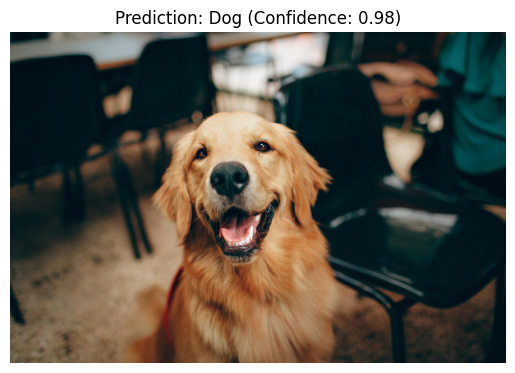

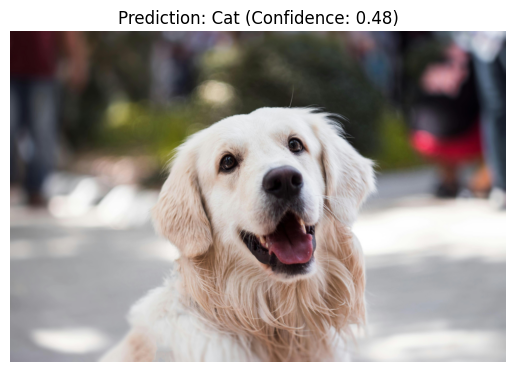

In [309]:
# Function to load and preprocess images from a test directory
def load_and_preprocess_test_images(test_dir, image_size=(150, 150)):
    images = []
    image_paths = []  # Store paths for later reference
    for img_name in os.listdir(test_dir):
        img_path = os.path.join(test_dir, img_name)
        if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
            img = image.load_img(img_path, target_size=image_size)
            img_array = image.img_to_array(img)
            img_array = img_array / 255.0  # Normalize the image to the range [0, 1]
            images.append(img_array)
            image_paths.append(img_path)  # Save the path of the image

    if len(images) == 0:
        print("No images found in the directory.")
    return np.array(images), image_paths

# Function to make predictions on a batch of images
def predict_test_images(model, test_dir):
    # Load and preprocess images from the test directory
    images, image_paths = load_and_preprocess_test_images(test_dir)
    
    if len(images) == 0:
        print("No images found for prediction.")
        return
    
    # Ensure the images are in the correct shape (batch_size, 150, 150, 3)
    if len(images.shape) == 3:
        images = np.expand_dims(images, axis=0)  # Add batch dimension if needed

    # Make predictions
    predictions = model.predict(images)
    
    # Display images and predictions
    for img_path, pred in zip(image_paths, predictions):
        img = image.load_img(img_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Prediction: {'Dog' if pred > 0.5 else 'Cat'} (Confidence: {pred[0]:.2f})")
        plt.show()

# Example usage
test_directory = r"C:/Users/vishw/Desktop/imgclass/tts/"  # Replace with your actual test folder path

# Test the model with the images in the test directory
predict_test_images(model, test_directory)

